<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">

# Intermediate Python &mdash; Day 2

**pandas for Finance**

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

## Financial Data

In [2]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [3]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [5]:
raw.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [6]:
rets = np.log(raw / raw.shift(1))

In [7]:
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


In [8]:
rets.describe().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000,1971.000
mean,0.001,0.001,0.000,0.001,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,0.016,0.014,0.014,0.020,0.017,0.009,0.009,0.075,0.006,0.010,0.024,0.010
min,-0.132,-0.121,-0.095,-0.135,-0.137,-0.067,-0.069,-0.351,-0.027,-0.089,-0.114,-0.092
25%,-0.007,-0.007,-0.008,-0.009,-0.008,-0.003,-0.003,-0.041,-0.004,-0.005,-0.014,-0.005
50%,0.001,0.000,0.001,0.001,0.001,0.001,0.001,-0.006,0.000,0.000,-0.000,0.000
75%,0.010,0.008,0.008,0.012,0.009,0.005,0.005,0.035,0.003,0.006,0.014,0.006
max,0.085,0.099,0.089,0.146,0.090,0.045,0.046,0.405,0.030,0.047,0.107,0.048


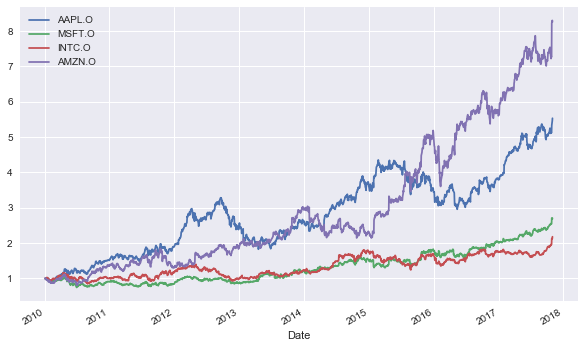

In [9]:
# to_plot = raw[['AAPL.O', 'MSFT.O']]
to_plot = raw.iloc[:, :4]
(to_plot / to_plot.iloc[0]).plot(figsize=(10, 6));

## Adding Rolling Statistics

In [10]:
sym = 'AAPL.O'

In [11]:
data = pd.DataFrame(raw['AAPL.O'])

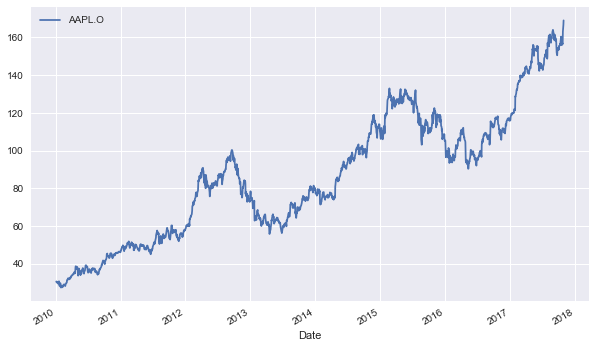

In [12]:
data.plot(figsize=(10, 6));

In [13]:
data['SMA1'] = data[sym].rolling(42).mean()

In [14]:
data['SMA2'] = data[sym].rolling(252).mean()

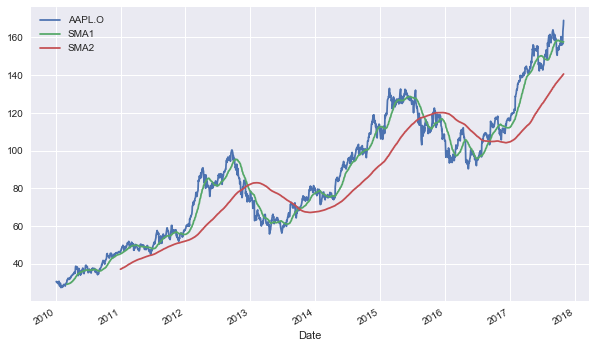

In [15]:
data.plot(figsize=(10, 6));

In [16]:
data.dropna(inplace=True)

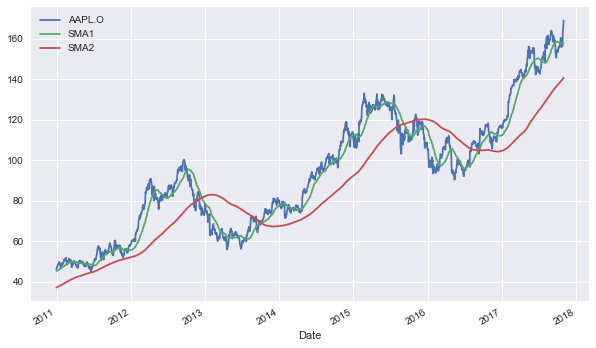

In [17]:
data.plot(figsize=(10, 6));

In [18]:
(data['SMA1'] > data['SMA2']).head()

Date
2010-12-31    True
2011-01-03    True
2011-01-04    True
2011-01-05    True
2011-01-06    True
dtype: bool

In [19]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

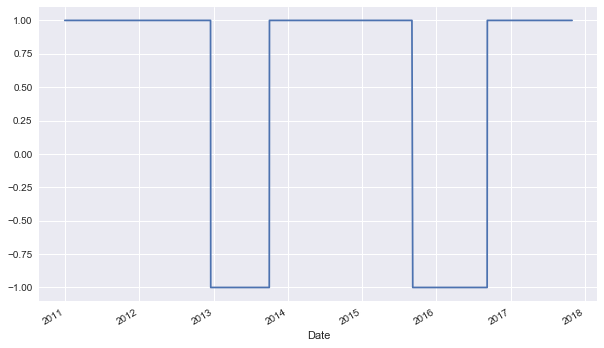

In [20]:
data['Position'].plot(figsize=(10, 6));

## Discovering Seasonality in Data

In [21]:
data = raw[['.SPX', '.VIX']]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 2 columns):
.SPX    1972 non-null float64
.VIX    1972 non-null float64
dtypes: float64(2)
memory usage: 46.2 KB


In [23]:
rets = np.log(data / data.shift(1)).dropna()

In [24]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1971 entries, 2010-01-05 to 2017-10-31
Data columns (total 2 columns):
.SPX    1971 non-null float64
.VIX    1971 non-null float64
dtypes: float64(2)
memory usage: 46.2 KB


In [25]:
d = rets.index[-1]
d

Timestamp('2017-10-31 00:00:00')

In [26]:
d.month

10

In [27]:
months = [date.month for date in rets.index]

In [28]:
rets['month'] = months

In [29]:
rets['month'].value_counts()

8     178
3     176
10    174
6     172
5     169
7     168
4     165
9     164
1     159
2     154
12    149
11    143
Name: month, dtype: int64

In [30]:
rets.head()

,.SPX,.VIX,month
Date,,,
2010-01-05,0.003111,-0.035038,1
2010-01-06,0.000545,-0.009868,1
2010-01-07,0.003993,-0.005233,1
2010-01-08,0.002878,-0.050024,1
2010-01-11,0.001745,-0.032514,1


In [31]:
rets.groupby('month').mean().sort_values('.VIX')

,.SPX,.VIX
month,,
2,0.001548,-0.005847
10,0.001535,-0.004663
3,0.000995,-0.004619
7,0.000977,-0.002806
11,0.000570,-0.002534
4,0.000482,0.000639
9,0.000233,0.000763
1,-0.000261,0.001330
12,0.000659,0.001423


In [32]:
rets.corr()

,.SPX,.VIX,month
.SPX,1.000000,-0.808372,0.005370
.VIX,-0.808372,1.000000,0.005788
month,0.005370,0.005788,1.000000


## Leverage Effect

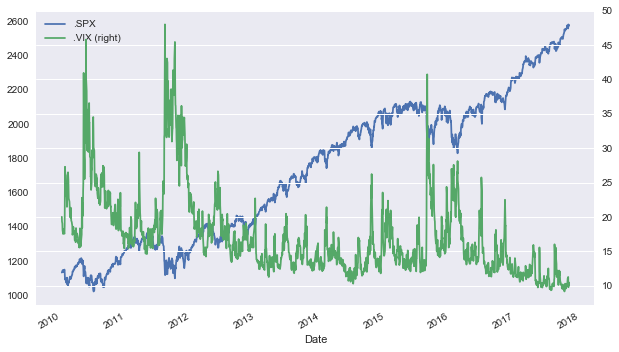

In [33]:
data[['.SPX', '.VIX']].plot(figsize=(10, 6), secondary_y='.VIX');

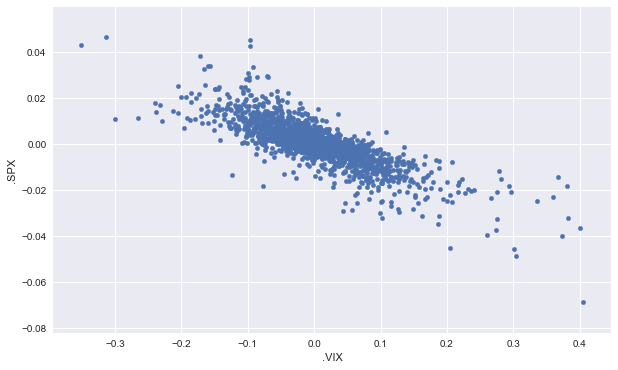

In [34]:
rets[['.SPX', '.VIX']].plot(x='.VIX', y='.SPX', kind='scatter',
                           figsize=(10, 6));

In [35]:
reg = np.polyfit(rets['.VIX'], rets['.SPX'], deg=1)
line = np.polyval(reg, rets['.VIX'])

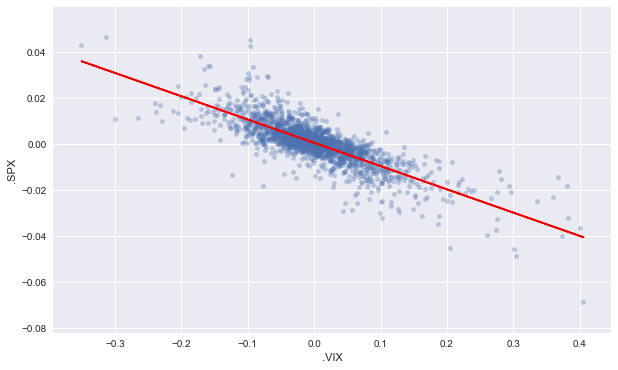

In [36]:
rets[['.SPX', '.VIX']].plot(x='.VIX', y='.SPX', kind='scatter',
                           figsize=(10, 6), alpha=0.33)
plt.plot(rets['.VIX'], line, 'r');

## Replacing Values

In [37]:
to_replace = {1: 'Jan', 2: 'Feb', 3: 'Mar', 10: 'Oct'}

In [38]:
rets['month'].replace(to_replace, inplace=True)

In [39]:
rets.tail()

,.SPX,.VIX,month
Date,,,
2017-10-25,-0.004674,0.006253,Oct
2017-10-26,0.001270,0.006214,Oct
2017-10-27,0.008041,-0.142420,Oct
2017-10-30,-0.003198,0.068993,Oct
2017-10-31,0.000944,-0.030950,Oct


## MVP Class

In [40]:
import mvp_class as mvp

In [41]:
from importlib import reload

In [42]:
reload(mvp)

<module 'mvp_class' from '/Users/yves/Dropbox/Program/bnp/day2/mvp_class.py'>

In [43]:
symbols = ['AAPL.O', 'MSFT.O']

In [44]:
# len(symbols) * [1 / len(symbols)]

In [45]:
port = mvp.mean_variance_portfolio(symbols=symbols)

In [46]:
port.symbols

['AAPL.O', 'MSFT.O']

In [47]:
port.weights

[0.5, 0.5]

In [48]:
port.rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
dtype: float64

In [49]:
port.rets.std() * 252 ** 0.5

AAPL.O    0.254753
MSFT.O    0.224130
dtype: float64

In [50]:
np.dot(port.rets.mean() * 252, port.weights)

0.1725169315298633

In [51]:
port.calculate_port_return()

0.1725169315298633

In [52]:
port.calculate_port_volatility()

0.2000883231352456

In [53]:
port.calculate_port_volatility(weights=[1/3, 2/3])

0.19884440479906271

In [54]:
pc = np.random.random((10, len(symbols)))

In [55]:
pc = (pc.T / pc.sum(axis=1)).T

In [56]:
pc

array([[ 0.45765322,  0.54234678],
       [ 0.91969229,  0.08030771],
       [ 0.5795108 ,  0.4204892 ],
       [ 0.81175986,  0.18824014],
       [ 0.74143582,  0.25856418],
       [ 0.3240634 ,  0.6759366 ],
       [ 0.33777681,  0.66222319],
       [ 0.60069952,  0.39930048],
       [ 0.16987565,  0.83012435],
       [ 0.73097698,  0.26902302]])

In [57]:
pc.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [58]:
port.simulate_portfolios(250)

In [59]:
# port.results

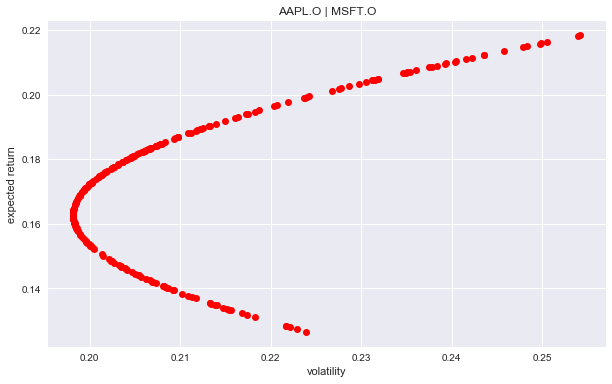

In [60]:
port.plot_results()

In [61]:
symbols = ['AAPL.O', 'MSFT.O', 'GLD']

In [62]:
symbols

['AAPL.O', 'MSFT.O', 'GLD']

In [63]:
# len(symbols) * [1 / len(symbols)]

In [64]:
port = mvp.mean_variance_portfolio(symbols=symbols)

In [65]:
port.simulate_portfolios(1500)

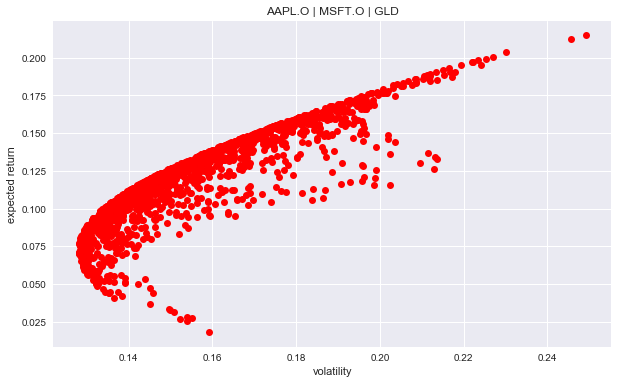

In [66]:
port.plot_results()

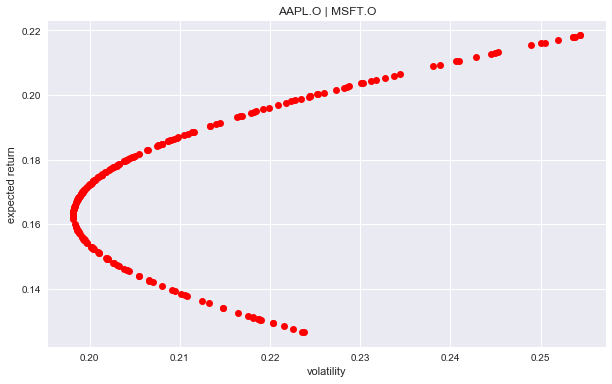

In [67]:
%run mvp_class.py

<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">